<h1>Kmeans Clustering</h1>
<img src="K_means.gif" width="1000" align="center">
With our knowledge of Python and now Numpy lets create an implementation of a famous machine learning algorithm "K-Means Clustering". The job of a clustering algorithm is to break a dataset into some number of "clusters" (groups), the number of clusters usually defined by the user. K-Means clustering works by iteratively updating a pre-defined number of cluster centers. It does this by finding the distance between each datapoint and every cluster center. Datapoints are then assigned to the cluster center they are closest to and each cluster center is updated to be the mean of the new cluster. These steps are repeated for some number of steps or until the cluster centers converge (they stop moving so much).<br>

[For more Information on K-means](https://en.wikipedia.org/wiki/K-means_clustering)<br>

<b>Lets have a look at the steps of K-means clustering</b><br>
1. Define the number of clusters "k" you want to group your data into<br>
2. Randomly initialise k vectors with the same size as each datapoint, this is the initialisation of our cluster centers<br>
3. Calculate the distance between each datapoint and each cluster center (using MSE or equivalent)<br>
4. For every datapoint find the cluster center they are closest to<br>
5. Re-calculate the cluster centers by finding the mean of every new cluster<br>
6. Repeat steps 3-5 for n steps or until convergence

In [1]:
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

# Custom module to deal with downloading the dataset
from load import test_x

<b>Using the module "load" that comes with this notebook, lets load our dataset</b><br>
The dataset we'll be using is the MNIST dataset, a dataset of small, low-res handwritten digits. There are 60000 training images and 10000 test images divided up into 10 classes (digits 0-9). Here we will be using the test set (as it's a smaller set)

In [3]:
# The images are 8 bit greyscale images (values range from 0-255)
# We'll rescale the pixel values to be between 0-1 (We don't REALLY need to do this for k-means)
test_x = test_x.astype(float) / 255

<b>Lets visualise some data!</b>

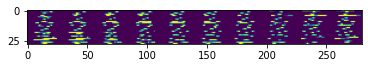

In [4]:
plt.imshow(test_x[0:10].reshape(10, 28, 28).transpose(0, 1, 2).reshape(28, 28 * 10))

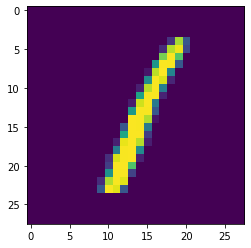

In [5]:
rand_img1 = test_x[np.random.randint(0, test_x.shape[0])]
plt.imshow(rand_img1.reshape(28, 28))

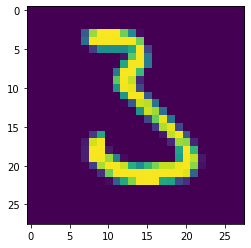

In [6]:
rand_img2 = test_x[np.random.randint(0, test_x.shape[0])]
plt.imshow(rand_img2.reshape(28, 28))

In [7]:
distance = np.linalg.norm(rand_img1 - rand_img2)
print(distance)

9.812010780444322


In [8]:
# 10k images, each is 28 x 28
# in this case each datapoint is an image in a sea of images
test_x.shape

(10000, 784)

In [9]:
test_x[test_x > 0].shape

(1511219,)

<h3> Kmeans Algorithm </h3>
Now implement the main steps of the K-Means clustering algorithm! Try and make it as efficient as possible and minimise the time/iteration, using Numpy functionality you should be able to get it down to only one For loop (do NOT use any K-Means functions!)

<b>Lets have a look at the steps of K-means clustering</b><br>
1. Define the number of clusters "k" you want to group your data into<br>
2. Randomly initialise k vectors with the same size as each datapoint, this is the initialisation of our cluster centers<br>
3. Calculate the distance between each datapoint and each cluster center (using MSE or equivalent)<br>
4. For every datapoint find the cluster center they are closest to<br>
5. Re-calculate the cluster centers by finding the mean of every new cluster<br>
6. Repeat steps 3-5 for n steps or until convergence

In [10]:
# Number of datapoints (images)
num_img = test_x.shape[0]
# Number of cluster centers, 10 because the dataset contains 10 classes eg: digit 0 to 9
num_clusters = 10
# We'll perform this many iterations of the algorithm
num_iter = 20
# Each image is 28*28 pixels, which has been flattened to a 1D 0f 784 values
img_flat_dim = test_x.shape[1]

In [11]:
# Randomly generate K indices for k datapoints from the dataset (indices need to be int)
# initialize clusters
indices = np.random.randint(0, test_x.shape[0], num_clusters)
means = test_x[indices]
# add new dimension
data = np.expand_dims(test_x, axis=1)
# copy according to number of clusters
data = np.repeat(data, num_clusters, axis=1)
distances = np.zeros((num_img, num_clusters, img_flat_dim))

# Slow

In [12]:
start_time = time.time()
cluster_idx = np.zeros(num_img)
for i in range(num_iter):
    # calculate distance between every image and the initial clusters
    for j in range(num_img):
        dist_to_clusters = []
        for k in range(num_clusters):
            dist = np.mean((test_x[j, :] - means[k, :]) ** 2)
            dist_to_clusters.append(dist)
        # find index of cluster with smallest distance
        cluster_idx[j] = np.argmin(dist_to_clusters)
    # update cluster positions
    for l in range(num_clusters):
        count = 0
        cluster_sum = 0
        for p in range(num_img):
            if cluster_idx[p] == l:
                count += 1
                cluster_sum += test_x[p, :]
        if count > 0:
            means[l, :] = cluster_sum / count
    clear_output(True)
    print("Iteration [%d/%d]" % (i, num_iter))

end_time = time.time()
print(
    "%d iterations took %.2f seconds, which corresponds to %.2fs/iteration"
    % (num_iter, end_time - start_time, (end_time - start_time) / num_iter)
)

Iteration [19/20]
20 iterations took 24.12 seconds, which corresponds to 1.21s/iteration


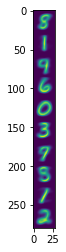

In [13]:
img = means.reshape(num_clusters * 28, 28)
plt.imshow(img)

# Fast

In [14]:
indices = np.random.randint(0, test_x.shape[0], num_clusters)
means = test_x[indices]

In [19]:
start_time = time.time()
for i in range(num_iter):
    # add on a dimension in the right place and use broadcasting to find the differences
    # expanded means has dims (10, 1, 784)
    # expanded test_x has dims (1, 10000, 784)
    diff_from_means = np.expand_dims(means, 1) - np.expand_dims(test_x, 0)
    # using absolute sum of differences here, INSTEAD of Mean Squared Error
    # resulting dim is (10, 10000)
    dist_to_means = np.sum(np.abs(diff_from_means), 2)
    # find which mean each image is closest toInsert a new axis that will appear at the axis position in the expanded array shape.
    # (10, 10000) becomes (10000,)
    idx_of_means = np.argmin(dist_to_means, 0)
    # create a one hot coded vector per datapoint
    # (10, 10000)
    a = np.eye(num_clusters)[idx_of_means].T
    # multiply to get the sums of each cluster then divide by elements per cluster to get means
    means = np.matmul(a, test_x) / np.expand_dims(np.sum(a, 1), 1)

    clear_output(True)
    print("Itteration [%d/%d]" % (i, num_iter))

end_time = time.time()
print(
    "%d iterations took %.2f seconds, which corresponds to %.2fs/iteration"
    % (num_iter, end_time - start_time, (end_time - start_time) / num_iter)
)

Itteration [19/20]
20 iterations took 8.15 seconds, which corresponds to 0.41s/iteration


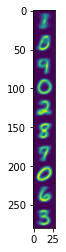

In [18]:
img = means.reshape(num_clusters * 28, 28)
plt.imshow(img)